In [32]:
# The libraries used in processing the dataset
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn as ib
import time
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [33]:
# The dataframe is read from the csv file - healthcare-dataset-stroke-data.csv - taken from kaggle
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [34]:
# The first 5 instances of the dataframe
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Find the number of NULL values in each column

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


<Axes: >

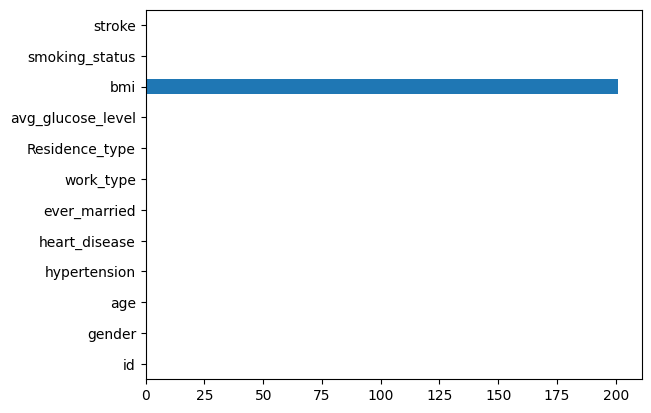

In [35]:
# Printing the number of N/A values in eacg column
print(df.isna().sum())
# Graphical representation of the na values present in the attribute - bar graph
df.isna().sum().plot.barh()

* Found 201 NULL values in bmi column

In [36]:
# To check the  statistical analysis of all numerical type attributes  (count, mean, standaard deviation, minimum values, all quartiles, maximum values)
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [37]:
# Provides the data type of all attributes and the number of NOT NULL values count is obtained
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## PRE PROCESSING + EDA

In [38]:
# The 'id' column is dropped since the attribute holds no significant importance to the problem at hand
df = df.drop(['id'],axis=1)

### Gender analysis

In [39]:
# Checking the values in the gender column
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

* We have a 'other' gender and since there is only 1 instance we will remove it as to reduce the dimension of age

<Axes: ylabel='count'>

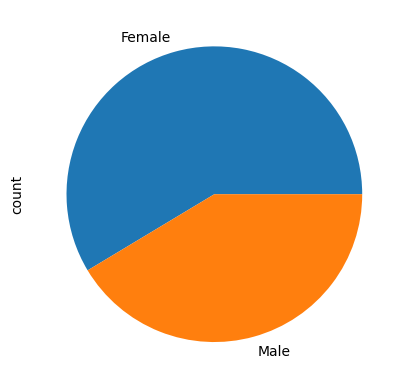

In [40]:
# Removing the 'other' gender instance inorder to reduce the dimension
df['gender'] = df['gender'].replace('Other','Female')
# plotting a pie chart to see the gender count distribution
df['gender'].value_counts().plot(kind="pie")

* There are more females as compared to males 

## Target feature - Stroke

* Stroke analysis

In [41]:
# Value count in the stroke attribute
df['stroke'].value_counts()


stroke
0    4861
1     249
Name: count, dtype: int64

<Axes: xlabel='stroke'>

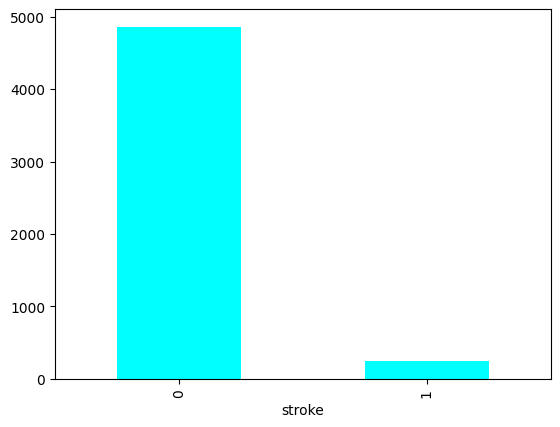

In [42]:
# Graphical representation of the value count distribution of the target attribute
df['stroke'].value_counts().plot(kind="bar",color = "cyan")

In [43]:
print("% of people who actualy got a stroke : ",(df['stroke'].value_counts()[1]/df['stroke'].value_counts().sum()).round(3)*100)

% of people who actualy got a stroke :  4.9


In [44]:
# Analysing whether to drop NA values in Bmi column
df_na=df.loc[df['bmi'].isnull()]
print("Nan BMI values where people have stroke:",df_na['stroke'].sum())
print("overall BMI values where people have stroke:",df['stroke'].sum())


Nan BMI values where people have stroke: 40
overall BMI values where people have stroke: 249


In [45]:
# Imputing the missing N/A values using the median of bmi column
print("median of bmi",df['bmi'].median())
df['bmi']=df['bmi'].fillna(df['bmi'].median())

median of bmi 28.1


In [46]:
numerical_data = df.select_dtypes(include=['float64', 'int64'])

<Axes: >

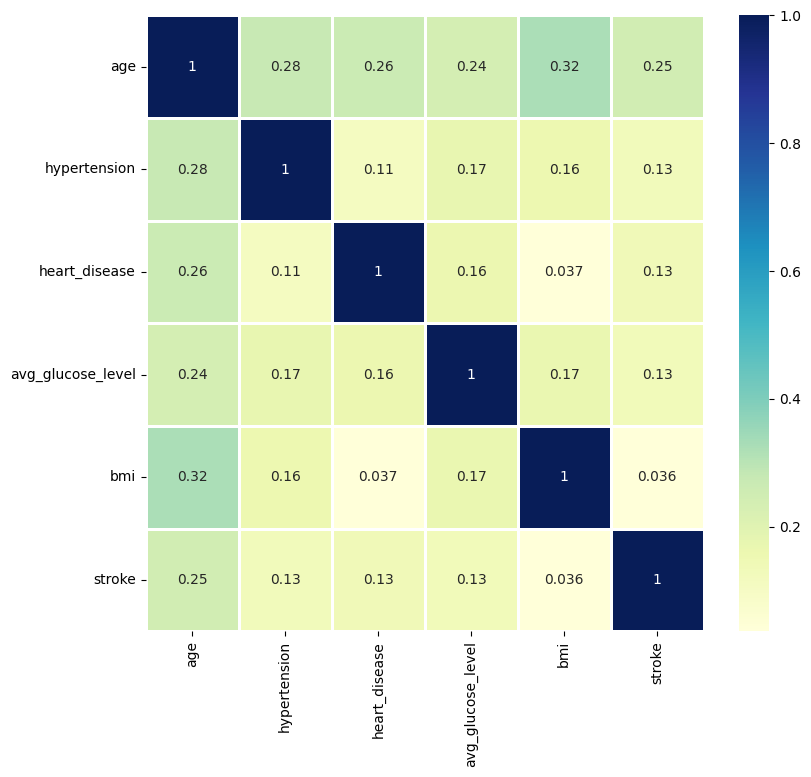

In [47]:
# Correlation matrix between the attributes in the dataset to find if any attributes are correlated
corrmat=numerical_data.corr()
f,ax=plt.subplots(figsize=(9,8))
sns.heatmap(corrmat,ax=ax,cmap="YlGnBu",linewidth=0.8,annot=True)

* There is  a weak correlation between the attributes as per the plotted heatmap
* The highest correlation found was between age and bmi - 0.32
* Rest all correlations were less than 0.32
* We could not drw any statistical insight from heatmap

## Cross analysis - all the attribute compared with target attibute

<Axes: xlabel='stroke', ylabel='count'>

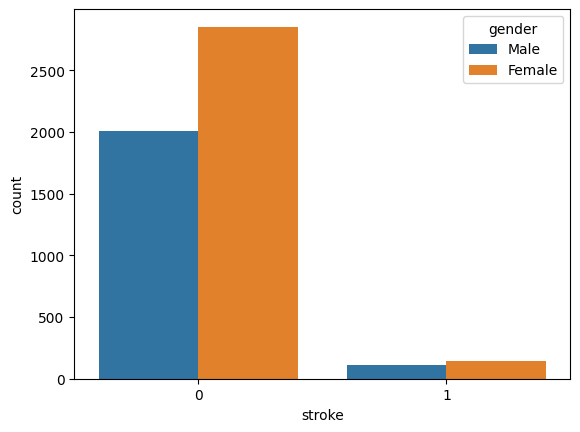

In [48]:
# Comparing stroke with gender
sns.countplot(x='stroke', hue='gender', data=df)

<Axes: xlabel='stroke', ylabel='count'>

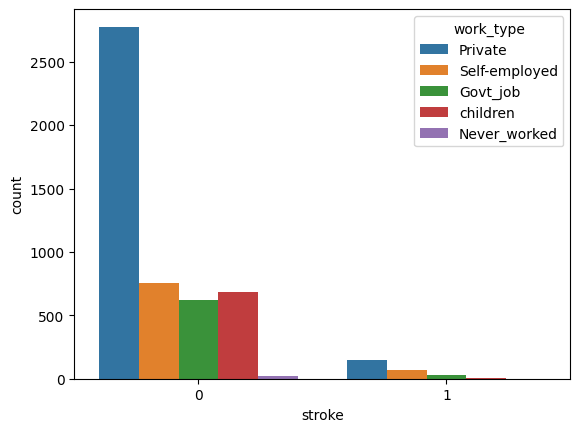

In [49]:
# Comparing stroke with work-type
sns.countplot(x='stroke', hue='work_type', data=df)

* Based on this comparison we see in the provided dataset that people who never worked never got a heart attack and the people who are privetly employed got more strokes

<Axes: xlabel='stroke', ylabel='count'>

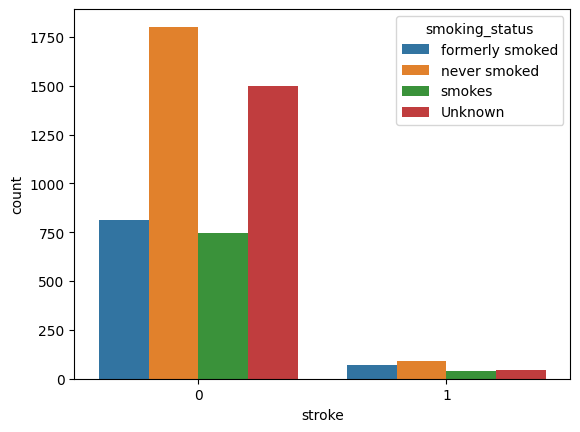

In [50]:
# Comparing stroke with somking_status
sns.countplot(x='stroke', hue='smoking_status', data=df)

* Based on the plot we can that those who formerly smoked got more strokes The people who smoked and never smoked has a somewhat same probability of getting stroke

<Axes: xlabel='stroke', ylabel='count'>

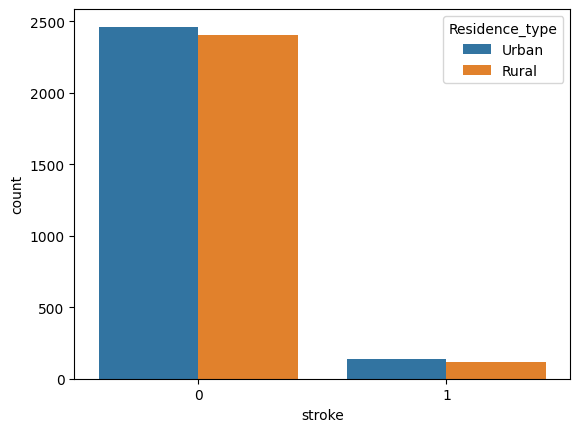

In [51]:
# Comparing stroke with residence type
sns.countplot(x='stroke', hue='Residence_type', data=df)

* Based on the analysis the people who live in Urban areas were reported with more strokes

<Axes: xlabel='stroke', ylabel='count'>

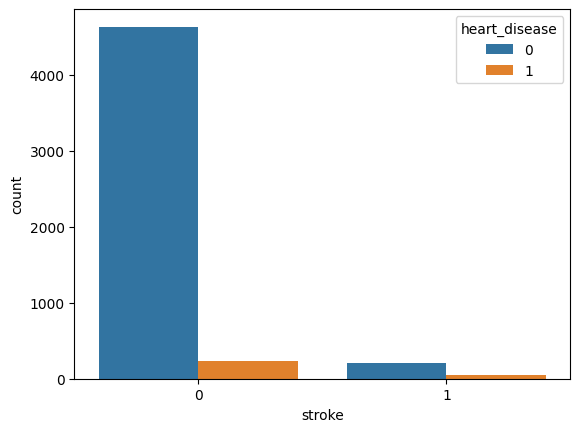

In [52]:
# Comparing stroke with heart disease
sns.countplot(x='stroke', hue='heart_disease', data=df)

* This plotting shows that the number of "people with Strokes but no heart disease" is approximately 6 to 8 times the number of "people with Strokes and also heart disease". This shows most of the people with no heart disease are suffering with Strokes compared to the once who have Heart Disease.

<Axes: xlabel='stroke', ylabel='count'>

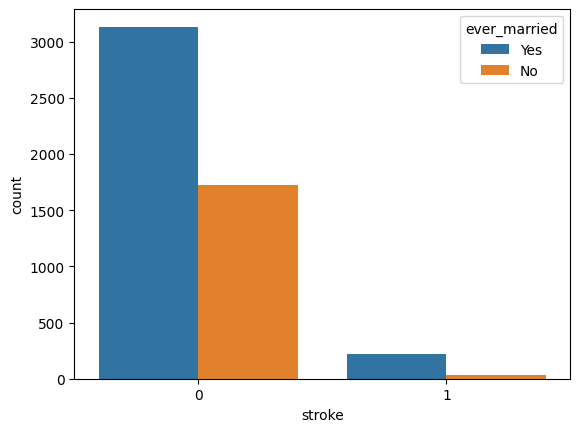

In [53]:
# Comparing stroke with married status
sns.countplot(x='stroke', hue='ever_married', data=df)

* This plotting shows that the number of "Married people with Strokes" is approximately 10 to 12 times the no. "Unmarried people with Strokes". 
* This shows most of the Married people got Strokes compared to Unmarried people.

### Creating dummy variables for numeric-binary attributes

In [54]:
# Converting numeric-binary value attributes to string
df[['hypertension', 'heart_disease', 'stroke']] = df[['hypertension', 'heart_disease', 'stroke']].astype(str)
# Generating dummy attributes - one hot encoding format
df = pd.get_dummies(df, drop_first= True)


In [55]:
# The data frame after performing dummy attributes
df.head()

,age,avg_glucose_level,bmi,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_1
0,67.0,228.69,36.6,True,False,True,True,False,True,False,False,True,True,False,False,True
1,61.0,202.21,28.1,False,False,False,True,False,False,True,False,False,False,True,False,True
2,80.0,105.92,32.5,True,False,True,True,False,True,False,False,False,False,True,False,True
3,49.0,171.23,34.4,False,False,False,True,False,True,False,False,True,False,False,True,True
4,79.0,174.12,24.0,False,True,False,True,False,False,True,False,False,False,True,False,True


In [56]:
# Since our Dataset is highly undersampled (based on target instances) we are going to perform a over sampling method to have equal representation of both the target classes
# Using random oversampling - importing the library 
from imblearn.over_sampling import RandomOverSampler

# Performing a minority oversampling
oversample = RandomOverSampler(sampling_strategy='minority')
X=df.drop(['stroke_1'],axis=1)
y=df['stroke_1']

# Obtaining the oversampled dataframes - testing and training
X_over, y_over = oversample.fit_resample(X, y)

In [57]:
# importing a scaling modeule
from sklearn.preprocessing import StandardScaler

# Since the numeric attributes in the dataset is in different ranges and three are outliers persent we are usign a scaler to get all the values into the same range.
s = StandardScaler()
# Scaling the numeric attributes
df[['bmi', 'avg_glucose_level', 'age']] = s.fit_transform(df[['bmi', 'avg_glucose_level', 'age']])

* Scaling the numeric values for bringing them all to the same scale

### Creating test-train split (80-20 split)

In [58]:
'''from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')

# fit the object to our training data
X, y = smote.fit_resample(df.loc[:,df.columns!='stroke_1'], df['stroke_1'])
print("Shape of X: {}".format(X.shape))
print("Shape of y: {}".format(y.shape))'''

'from imblearn.over_sampling import SMOTE\nsmote = SMOTE(sampling_strategy=\'minority\')\n\n# fit the object to our training data\nX, y = smote.fit_resample(df.loc[:,df.columns!=\'stroke_1\'], df[\'stroke_1\'])\nprint("Shape of X: {}".format(X.shape))\nprint("Shape of y: {}".format(y.shape))'

In [59]:
# creating dataset split for training and testing the model
from sklearn.model_selection import train_test_split
# Performing a 80-20 test-train split
#X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size= 0.20, random_state= 42)
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size= 0.20, random_state= 42)

In [60]:
# Checking the size of the splits 
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (7777, 15)
y_train: (7777,)
X_test: (1945, 15)
y_test: (1945,)


## Training Model

### KNN

In [75]:
#importing the KNN Classifier module
start_time = time.time()
from sklearn.neighbors import KNeighborsClassifier
# Libraries for calculating performance metrics
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score

# Create the classifier object
# 2 neighbours because of the 2 classes
knn = KNeighborsClassifier(n_neighbors = 2)
# Training the classifier
knn.fit(X_train,y_train)
#predicting result using the test dataset
y_pred_knn = knn.predict(X_test)
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]

# Printing the accuracy and roc-auc score of the model
confusion_matrix(y_test, y_pred_knn)
print('Accuracy:',accuracy_score(y_test, y_pred_knn))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_knn))
end_time = time.time()

Accuracy: 0.9722365038560411
ROC AUC Score: 0.9723076923076923


In [76]:
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")
print(f"Execution time: {execution_time/60} minutes")

Execution time: 0.9750537872314453 seconds
Execution time: 0.01625089645385742 minutes


<b> As you can see, without Intel Optimizations, the time taken for training took 0.97s and the accuracy is the same.

<Axes: >

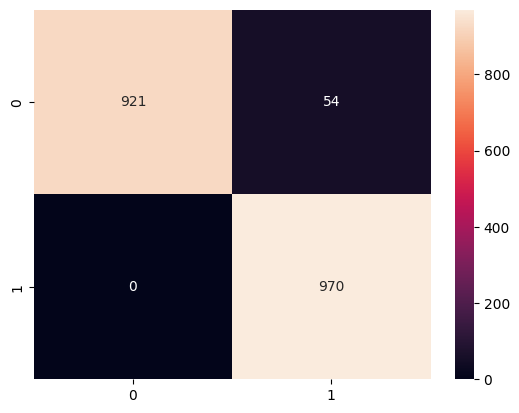

In [77]:
# Plotting the confusion matrix
from sklearn.metrics import confusion_matrix,precision_recall_fscore_support
sns.heatmap(confusion_matrix(y_test,y_pred_knn), annot=True,fmt='d')

### XGBoost

In [78]:
#importing the XGBoost Classifier module
start_time = time.time()
from xgboost  import XGBClassifier

# Create the classifier object
xgb = XGBClassifier()
# Training the classifier
xgb.fit(X_train,y_train)
#predicting result using the test dataset
y_pred_xgb = xgb.predict(X_test)
y_pred_prob_xgb = xgb.predict_proba(X_test)[:, 1]

# Printing the accuracy and roc-auc score of the model
print('Accuracy:', accuracy_score(y_test, y_pred_xgb))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_xgb))
end_time = time.time()


Accuracy: 0.9727506426735218
ROC AUC Score: 0.9971356066613799


In [79]:
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")
print(f"Execution time: {execution_time/60} minutes")

Execution time: 16.09746766090393 seconds
Execution time: 0.2682911276817322 minutes


<b> As you can see, without Intel Optimizations, the time taken for training took 16.09s and the accuracy is the same (Intel a bit more still).

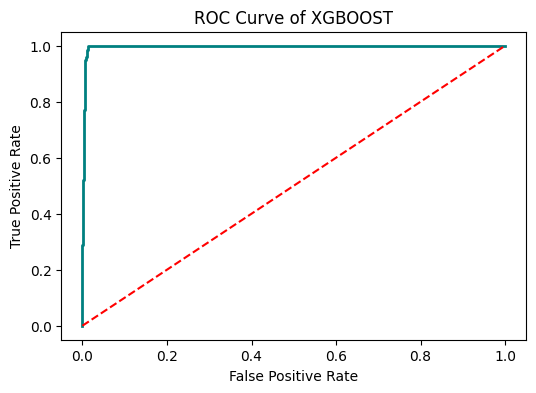

In [80]:
# plots of roc_auc 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_xgb)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2, color= 'teal')
plt.plot([0,1], [0,1], 'r--' )
plt.title('ROC Curve of XGBOOST')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

<Axes: >

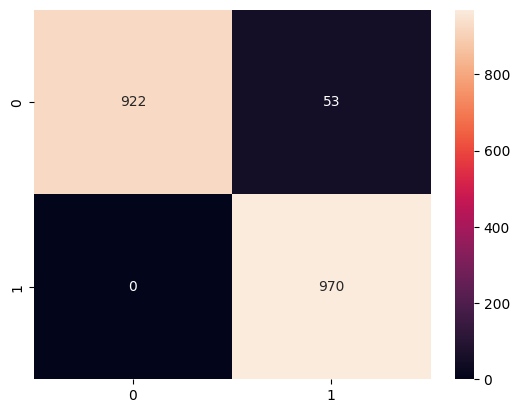

In [81]:
# Plotting the confusion matrix
from sklearn.metrics import confusion_matrix,precision_recall_fscore_support
sns.heatmap(confusion_matrix(y_test,y_pred_xgb), annot=True,fmt='d')

In [82]:
# Printing the precision,recall,f1score and support values of the model based on the confusion matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("Accuracy_score:",accuracy_score(y_test,y_pred_xgb))
print("Precision_score:",precision_score(y_test,y_pred_xgb))
print("Recall_score:",recall_score(y_test,y_pred_xgb))
print("f1_score:",f1_score(y_test,y_pred_xgb))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_xgb))

Accuracy_score: 0.9727506426735218
Precision_score: 0.9481915933528837
Recall_score: 1.0
f1_score: 0.9734069242348219
ROC AUC Score: 0.9971356066613799


## Random Forest

In [85]:
# importing random forest classifier module for training
start_time = time.time()
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Create the classifier object
rf_clf = RandomForestClassifier(n_estimators = 100)

# Train the model using the training sets
rf_clf.fit(X_train, y_train)

# performing predictions on the test dataset
y_pred_rf = rf_clf.predict(X_test)
end_time = time.time()
# Printing accuracy of the model
print('Accuracy:', accuracy_score(y_test, y_pred_rf))

Accuracy: 0.9943444730077121


In [86]:
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")
print(f"Execution time: {execution_time/60} minutes")

Execution time: 1.5782966613769531 seconds
Execution time: 0.026304944356282552 minutes


<b> As you can see, without Intel Optimizations, the time taken for training took  1.57s and the accuracy is the same.

In [84]:
# Importing module for kfold cross validation
from sklearn import model_selection
from sklearn.model_selection import KFold

# Performing k fold cross validation using 20 splits
kfold_kridge = model_selection.KFold(n_splits=20, shuffle=True)
results_kfold = model_selection.cross_val_score(rf_clf, X, y, cv=kfold_kridge)
print("Accuracy: ", results_kfold.mean()*100)
print(results_kfold)

Accuracy:  95.01018688725492
[0.953125   0.92578125 0.92578125 0.96875    0.96875    0.92578125
 0.94921875 0.95703125 0.9453125  0.9609375  0.94901961 0.94509804
 0.97647059 0.95294118 0.94901961 0.94509804 0.94901961 0.94509804
 0.95686275 0.95294118]


<Axes: >

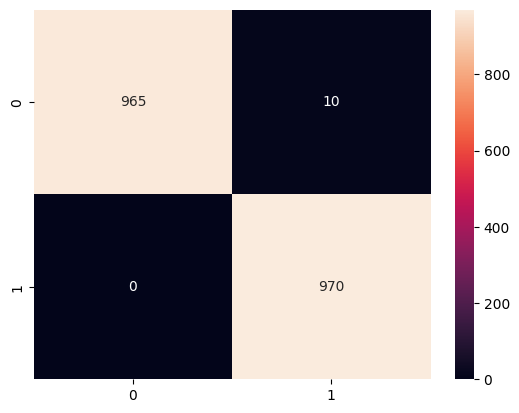

In [41]:
# Plotting the confusion matrix
from sklearn.metrics import confusion_matrix,precision_recall_fscore_support
sns.heatmap(confusion_matrix(y_test,y_pred_rf), annot=True,fmt='d')    

In [42]:
# Making sample predictions based on manual value entry
age=75
avg_glucose_level=300
bmi=36.6
gender_Male=1
ever_married_Yes=1	
work_type_Never_worked=0	
work_type_Private=1	
work_type_Self_employed=0
work_type_children=0	
Residence_type_Urban=1
smoking_status_formerly_smoked=1
smoking_status_never_smoked=0
smoking_status_smokes=0
hypertension_1=1
heart_disease_1=1
input_features = [age	,avg_glucose_level,	bmi	,gender_Male,hypertension_1,	heart_disease_1,ever_married_Yes,	work_type_Never_worked,	work_type_Private,	work_type_Self_employed,	work_type_children	,Residence_type_Urban,	smoking_status_formerly_smoked,smoking_status_never_smoked	,smoking_status_smokes]

features_value = [np.array(input_features)]
features_name = ['age'	,'avg_glucose_level',	'bmi'	,'gender_Male'	,'hypertension_1',	'heart_disease_1','ever_married_Yes',	'work_type_Never_worked',	'work_type_Private',	'work_type_Self-employed',	'work_type_children'	,'Residence_type_Urban',	'smoking_status_formerly smoked','smoking_status_never smoked'	,'smoking_status_smokes']

df = pd.DataFrame(features_value, columns=features_name)
prediction = rf_clf.predict(df)[0]
print(prediction)

1


In [43]:
# For the front end 
import pickle

with open('model.pkl','wb') as f:
  pickle.dump(rf_clf,f)